## 1 Descarga


La carga de información se realizó conn con el cuaderno 02downloadDataV2.0.ipynb


## 1 Preprocessado de Datos

In [547]:
%pip install pandas
%pip install scikit-learn
%pip install tqdm
%pip install requests
%pip install folium
%pip install tensorflow

215183.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


215188.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


215194.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


215200.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


215206.13s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


215211.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [548]:
import pandas as pd
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns




import requests
import time
import subprocess
import json
import folium
import ast

import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Verificar si el recurso está disponible
print("Punkt descargado correctamente.")


Punkt descargado correctamente.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victormontaluisa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victormontaluisa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/victormontaluisa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [549]:
#carga de informacion
df = pd.read_csv('dataset.csv', sep=';')



Listado de las columnas presentes en el archivo `filtered_data.csv` 

1. **id**: Identificador único de la propiedad.
2. **listing_url**: URL del anuncio de la propiedad en AirBnB.
3. **scrape_id**: Identificador único para la tarea de scraping.
4. **last_scraped**: Fecha en la que se realizó el último scraping de los datos.
5. **source**: Fuente de los datos (por ejemplo, "city scrape").
6. **picture_url**: URL de la imagen de la propiedad.
7. **host_id**: Identificador único del anfitrión.
8. **host_url**: URL del perfil del anfitrión.
9. **host_name**: Nombre del anfitrión.
10. **host_since**: Fecha en la que el anfitrión se unió a AirBnB.
11. **host_location**: Ubicación del anfitrión (por ejemplo, ciudad o región).
12. **host_about**: Descripción del anfitrión.
13. **host_response_time**: Tiempo de respuesta del anfitrión a los mensajes.
14. **host_response_rate**: Tasa de respuesta del anfitrión.
15. **host_acceptance_rate**: Tasa de aceptación de las solicitudes del anfitrión.
16. **host_is_superhost**: Indica si el anfitrión es un "superhost".
17. **host_thumbnail_url**: URL de la imagen pequeña del perfil del anfitrión.
18. **host_picture_url**: URL de la imagen completa del perfil del anfitrión.
19. **host_neighbourhood**: Barrio o vecindad del anfitrión.
20. **host_listings_count**: Número de propiedades que el anfitrión tiene listadas.
21. **host_total_listings_count**: Total de propiedades que el anfitrión ha listado a lo largo del tiempo.
22. **host_verifications**: Verificaciones del anfitrión (por ejemplo, email, teléfono).
23. **host_has_profile_pic**: Indica si el anfitrión tiene foto de perfil.
24. **host_identity_verified**: Indica si la identidad del anfitrión ha sido verificada.
25. **neighbourhood**: Barrio o vecindad de la propiedad.
26. **neighbourhood_cleansed**: Barrio de la propiedad después de limpiarlo de inconsistencias.
27. **neighbourhood_group_cleansed**: Grupo de barrios de la propiedad después de limpiarlo de inconsistencias.
28. **latitude**: Latitud de la ubicación de la propiedad.
29. **longitude**: Longitud de la ubicación de la propiedad.
30. **property_type**: Tipo de propiedad (por ejemplo, "Apartamento", "Casa").
31. **room_type**: Tipo de habitación (por ejemplo, "Habitación privada", "Habitación compartida").
32. **accommodates**: Número máximo de personas que puede alojar la propiedad.
33. **bathrooms**: Número de baños de la propiedad.
34. **bathrooms_text**: Descripción textual de los baños de la propiedad.
35. **bedrooms**: Número de habitaciones de la propiedad.
36. **beds**: Número de camas de la propiedad.
37. **amenities**: Lista de servicios y comodidades que ofrece la propiedad.
38. **price**: Precio de la propiedad por noche.
39. **minimum_nights**: Número mínimo de noches para reservar la propiedad.
40. **maximum_nights**: Número máximo de noches para reservar la propiedad.
41. **minimum_minimum_nights**: Valor mínimo de noches mínimas en las propiedades.
42. **maximum_minimum_nights**: Valor máximo de noches mínimas en las propiedades.
43. **minimum_maximum_nights**: Valor mínimo de noches máximas en las propiedades.
44. **maximum_maximum_nights**: Valor máximo de noches máximas en las propiedades.
45. **minimum_nights_avg_ntm**: Promedio de noches mínimas por mes.
46. **maximum_nights_avg_ntm**: Promedio de noches máximas por mes.
47. **calendar_updated**: Fecha de la última actualización del calendario.
48. **has_availability**: Indica si la propiedad está disponible para alquilar.
49. **availability_30**: Disponibilidad de la propiedad para los próximos 30 días.
50. **availability_60**: Disponibilidad de la propiedad para los próximos 60 días.
51. **availability_90**: Disponibilidad de la propiedad para los próximos 90 días.
52. **availability_365**: Disponibilidad de la propiedad para todo el año.
53. **calendar_last_scraped**: Fecha en la que se raspó por última vez el calendario.
54. **number_of_reviews**: Número total de reseñas de la propiedad.
55. **number_of_reviews_ltm**: Número de reseñas en los últimos 12 meses.
56. **number_of_reviews_l30d**: Número de reseñas en los últimos 30 días.
57. **first_review**: Fecha de la primera reseña.
58. **last_review**: Fecha de la última reseña.
59. **review_scores_rating**: Puntuación general de la propiedad en las reseñas.
60. **review_scores_accuracy**: Puntuación de exactitud de las reseñas.
61. **review_scores_cleanliness**: Puntuación de limpieza de las reseñas.
62. **review_scores_checkin**: Puntuación de la experiencia de check-in.
63. **review_scores_communication**: Puntuación de la comunicación con el anfitrión.
64. **review_scores_location**: Puntuación de la ubicación de la propiedad.
65. **review_scores_value**: Puntuación del valor de la propiedad.
66. **license**: Licencia de la propiedad, si está disponible.
67. **instant_bookable**: Indica si la propiedad es reservable instantáneamente.
68. **calculated_host_listings_count**: Número total de propiedades del anfitrión.
69. **calculated_host_listings_count_entire_homes**: Número de propiedades del anfitrión que son casas completas.
70. **calculated_host_listings_count_private_rooms**: Número de propiedades del anfitrión que son habitaciones privadas.
71. **calculated_host_listings_count_shared_rooms**: Número de propiedades del anfitrión que son habitaciones compartidas.
72. **reviews_per_month**: Promedio de reseñas por mes de la propiedad.

---

Estas columnas contienen información clave sobre las propiedades de AirBnB y sus anfitriones, desde los detalles de la propiedad hasta las puntuaciones de las reseñas. Si necesitas más información sobre alguna columna o cómo trabajar con estos datos, no dudes en preguntar.

In [550]:
df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 72, dtype: object

In [551]:
#eliminar registro duplicados por el id

df_descargados_sinduplicados=df.copy()

# Eliminar las filas duplicadas basadas en la columna 'id'
df_descargados_sinduplicados = df_descargados_sinduplicados.drop_duplicates(subset='id', keep='first')

# Verificar que se eliminaron las filas duplicadas
print(df_descargados_sinduplicados.shape)


(3600, 72)


In [552]:
# Filtrar las filas duplicadas en la columna 'id'
duplicados = df_descargados_sinduplicados[df_descargados_sinduplicados['id'].duplicated(keep=False)]  # keep=False para mantener todas las filas duplicadas

# Mostrar los primeros 5 registros duplicados
print(duplicados[['id']].head(5))

Empty DataFrame
Columns: [id]
Index: []


In [553]:
# Contar la cantidad de duplicados en la columna 'id'
regisrtos = df_descargados_sinduplicados['id'].duplicated().sum()
print(f'Cantidad de  regsitros  columna "id": {regisrtos}')


directorio = 'imagenes'  # Cambia esto a la ruta correcta de tu directorio
archivos_jpg = [archivo for archivo in os.listdir(directorio) if archivo.lower().endswith('.jpg')]
cantidad_jpg = len(archivos_jpg)
print(f'Cantidad de archivos .jpg en el directorio "{directorio}": {cantidad_jpg}')



Cantidad de  regsitros  columna "id": 0
Cantidad de archivos .jpg en el directorio "imagenes": 3109


NOTA: se ahn desacrgado 3109 imagees , se separaran lso registros que tiene imagenes para proceder con la practica

In [554]:
#revision de filas que no tienen imagenes

import os
import pandas as pd
from tqdm import tqdm



directorio_imagenes = 'imagenes'  # Cambia esto a la ruta correcta de tu directorio de imágenes



df_revision_existe_imagenes=df_descargados_sinduplicados.copy()
df_revision_existe_imagenes['archivo_imagen']=''
df_revision_existe_imagenes['imagen']=False

for index, row in tqdm(df_revision_existe_imagenes.iterrows(), total=df_revision_existe_imagenes.shape[0], desc="Procesando imágenes"):
        image_id = str(int(row['id']))  # Convertir el id a string
        img_path = os.path.join(directorio_imagenes, f"{image_id}.jpg")  # Ruta del archivo
        if os.path.isfile(os.path.join(img_path)):
            df_revision_existe_imagenes.at[index, 'imagen'] = True
            df_revision_existe_imagenes.at[index, 'archivo_imagen']=f"{image_id}.jpg"
        else:
            df_revision_existe_imagenes.at[index, 'archivo_imagen']=f""
            print(f"El archivo no existe {image_id}.")
 

distribucion = df_revision_existe_imagenes['imagen'].value_counts()




df_descargados=df_revision_existe_imagenes.loc[df_revision_existe_imagenes['imagen'] != False]
df_descargados['imagen'] = df_descargados['imagen'].astype(str)
# Imprimir la dimensión del DataFrame
# Imprimir la distribución
print(distribucion)
print(df_descargados.shape)

Procesando imágenes:   0%|          | 0/3600 [00:00<?, ?it/s]

El archivo no existe 77691.
El archivo no existe 220676.
El archivo no existe 1130279.
El archivo no existe 1445064.
El archivo no existe 2381143.
El archivo no existe 4000384.
El archivo no existe 4090224.
El archivo no existe 4461846.
El archivo no existe 4623114.
El archivo no existe 4662379.
El archivo no existe 4699828.
El archivo no existe 5768819.
El archivo no existe 6646604.
El archivo no existe 7531700.
El archivo no existe 7837202.
El archivo no existe 8923817.
El archivo no existe 12949309.
El archivo no existe 13063952.
El archivo no existe 13613229.
El archivo no existe 13650313.
El archivo no existe 14229841.
El archivo no existe 14976039.
El archivo no existe 15342021.
El archivo no existe 15819226.
El archivo no existe 16148182.
El archivo no existe 17023481.
El archivo no existe 17042710.
El archivo no existe 17617918.
El archivo no existe 17942707.
El archivo no existe 18032982.
El archivo no existe 18170647.
El archivo no existe 19969497.
El archivo no existe 215968

Procesando imágenes:  33%|███▎      | 1204/3600 [00:00<00:00, 12038.55it/s]

El archivo no existe 29682500.
El archivo no existe 29702825.
El archivo no existe 30180140.
El archivo no existe 30268517.
El archivo no existe 30390378.
El archivo no existe 30397078.
El archivo no existe 30516467.
El archivo no existe 31185088.
El archivo no existe 32330465.
El archivo no existe 32330630.
El archivo no existe 33196944.
El archivo no existe 33439464.
El archivo no existe 33440102.
El archivo no existe 33530646.
El archivo no existe 34133759.
El archivo no existe 34974052.
El archivo no existe 35481543.
El archivo no existe 37068313.
El archivo no existe 37709158.
El archivo no existe 38178173.
El archivo no existe 38274887.
El archivo no existe 38513768.
El archivo no existe 39536784.
El archivo no existe 39908091.
El archivo no existe 40423797.
El archivo no existe 40617998.
El archivo no existe 41102403.
El archivo no existe 41102476.
El archivo no existe 41614184.
El archivo no existe 41765021.
El archivo no existe 41785374.
El archivo no existe 41785889.
El archi

Procesando imágenes:  73%|███████▎  | 2632/3600 [00:00<00:00, 13355.17it/s]

El archivo no existe 775261963711450110.
El archivo no existe 776610853880546976.
El archivo no existe 781001738751122967.
El archivo no existe 786807008620011176.
El archivo no existe 787547697386254974.
El archivo no existe 796990908736037328.
El archivo no existe 797634392623375373.
El archivo no existe 797634833378646656.
El archivo no existe 797635200084843258.
El archivo no existe 798524113485453463.
El archivo no existe 800678625525343383.
El archivo no existe 801228312332129657.
El archivo no existe 802781307558619461.
El archivo no existe 810755335955230893.
El archivo no existe 821501113985650809.
El archivo no existe 825847770808405248.
El archivo no existe 826562966046818110.
El archivo no existe 828014040320230036.
El archivo no existe 828194448965037333.
El archivo no existe 828416110846192220.
El archivo no existe 831735030713466807.
El archivo no existe 831961056951139768.
El archivo no existe 836153649468461318.
El archivo no existe 837439628788914345.
El archivo no ex

Procesando imágenes: 100%|██████████| 3600/3600 [00:00<00:00, 13472.30it/s]

El archivo no existe 907906545606121142.
El archivo no existe 913916379699820077.
El archivo no existe 913916382033140518.
El archivo no existe 914937299546374137.
El archivo no existe 914937604671048989.
El archivo no existe 920192802910045769.
El archivo no existe 920305249278095220.
El archivo no existe 920595366557120290.
El archivo no existe 926909705378933833.
El archivo no existe 929285770816969080.
El archivo no existe 929770452264597730.
El archivo no existe 929784691737307760.
El archivo no existe 929790777252631206.
El archivo no existe 933238026788932430.
El archivo no existe 933341527778815745.
El archivo no existe 934549104804900845.
El archivo no existe 934846903887237232.
El archivo no existe 940287599154412651.
El archivo no existe 945916288884011126.
El archivo no existe 946041881162753201.
El archivo no existe 947768183186382957.
El archivo no existe 947785851072519783.
El archivo no existe 947814132068385867.
El archivo no existe 947846318188738138.
El archivo no ex


/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1988018351.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descargados['imagen'] = df_descargados['imagen'].astype(str)


In [555]:
#Eliminamos las columnas que no aportarian al modelo
#o que tienen ideas semejantes como host_id(que se mantien) y se quietan host_url,host_picture_url,etc
#o columnas vacias
#o columans que no aportarian por ser unitarios como Licesse


# Definir las columnas a eliminar
columnas_a_eliminar = [
    'listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url',
    'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
    'bathrooms', 'bedrooms', 'amenities', 'calendar_updated', 'calendar_last_scraped', 'license','imagen'
]

df_descargados_sin_basura = df_descargados.drop(columns=columnas_a_eliminar, errors='ignore')

df_descargados_sin_basura['p_zipcode'] = None
df_descargados_sin_basura['p_country_code'] = None
df_descargados_sin_basura['p_city'] = None


In [556]:


def detectar_outliers(df, column_name):
    # Calcular los cuartiles y el IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcular los límites inferior y superior para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Imprimir los resultados
    print(f"Columna: {column_name}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Límite inferior: {lower_bound}, Límite superior: {upper_bound}")
    
    # Identificar los registros fuera de los límites
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"  Cantidad de registros fuera de los outliers: {len(outliers)}")
    
    print('-' * 50)
    
    # Crear el boxplot para la columna
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot de {column_name}')
    
    # Agregar las líneas de los límites con etiquetas
    plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Límite inferior: {lower_bound:.2f}')
    plt.axvline(x=upper_bound, color='g', linestyle='--', label=f'Límite superior: {upper_bound:.2f}')
    
    # Mostrar la leyenda
    plt.legend()
    plt.show()
    
    # Crear un gráfico de puntos (scatter plot) para ver los outliers
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[column_name], y=[0] * len(df), color='blue', label='Datos normales')
    
    # Marcar los outliers en el gráfico de puntos
    sns.scatterplot(x=outliers[column_name], y=[0] * len(outliers), color='red', label='Outliers')
    plt.title(f'Gráfico de puntos de {column_name} con outliers')
    plt.legend()
    plt.show()

    return lower_bound, upper_bound  # Retorna los límites de outliers

##########################################################################################################


def mostrar_distribucion(df, column_name):

    # Comprobar si la columna existe en el DataFrame
    if column_name not in df.columns:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return
    
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    
    # Histograma con el gráfico de densidad (KDE)
    ax = sns.histplot(df[column_name], kde=True, bins=30, color='blue', alpha=0.6)
    
    # Títulos y etiquetas
    plt.title(f'Distribución de la columna: {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    
    # Agregar etiquetas a las barras del histograma
    for p in ax.patches:
        height = p.get_height()  # Obtener la altura de la barra
        x_position = p.get_x() + p.get_width() / 2  # Posición en el eje X
        ax.text(x_position, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)  # Etiqueta en la barra
    
    # Mostrar el gráfico
    plt.show()


##########################################################################################################


#funcion para conseguir zipconde y ciudad

def get_zipcode(lat, lon,index):
    try:
        # Construir la URL para la búsqueda inversa
        url = f"https://nominatim.openstreetmap.org/reverse?lat={lat}&lon={lon}&format=json&addressdetails=1"

        command = [
            "curl", "-s", "-X", "GET", url,
            "-H", "User-Agent: ziocode/1.0 (tucorreo@ejemplo.com)"
        ]
        result = subprocess.run(command, capture_output=True, text=True)
        response_text = result.stdout
        if result.returncode == 0 and response_text:
            response = json.loads(response_text)
            zipcode=response.get('address', {}).get('postcode', None)
            city=response.get('address', {}).get('city', None)
            country_code=response.get('address', {}).get('country_code', None)
#            print(f"i:{index}  Calculo: {lat}, Lon: {lon} = Zipcode: {zipcode}")

            return response, zipcode,country_code,city
        else:
            print(f"Error al ejecutar curl para Lat: {lat}, Lon: {lon}, i:{index}")
            return None
    except Exception as e:
        print(f"Error procesando las coordenadas Lat: {lat}, Lon: {lon},i{index}: {e}")
    return None


def agregar_data_geografica(df):
    # Crear las nuevas columnas
    df['p_zipcode'] = None
    df['p_country_code'] = None
    df['p_city'] = None
    
    # Iterar por cada fila del DataFrame con tqdm para mostrar el progreso
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Procesando coordenadas  {index}"):
        # Verificar si p_zipcode es nulo o vacío
        if pd.isna(row['p_zipcode']) or row['p_zipcode'] == '':
            lat = row['latitude']
            lon = row['longitude']
            
            todo, zipcode, country_code, city = get_zipcode(lat, lon, index)
            
            df.at[index, 'p_zipcode'] = zipcode
            df.at[index, 'p_country_code'] = country_code
            df.at[index, 'p_city'] = city

    return df



def mostrar_ubicaciones_geograficas_mapa(df):
    # Crear un mapa centrado en una ubicación promedio de las coordenadas
    mapa = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

    # Iterar sobre las filas para agregar marcadores de ubicación
    for _, row in df.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"Lat: {row['latitude']}, Lon: {row['longitude']}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(mapa)

    # Mostrar el mapa
    return mapa


def preprocesar_datos_outliers_precio(df, column_name, lower_limit, upper_limit):
    df_filtrado = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]        
    return df_filtrado
##########################################


# Función para limpiar  el texto
def limpiar_normalizar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñ ]', '', texto)
    tokens = word_tokenize(texto,'english',True)
    stop_words = set(stopwords.words('english'))  # Cambia 'english' a 'spanish' si es necesario
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]    
    return ' '.join(tokens)

#para normalizar normalizar###############################
def normalizar_aplicar_tfidf(df, columna_texto , prefijo='tfidf_'):
    df[columna_texto] = df[columna_texto].astype('string')
    df[columna_texto].fillna('', inplace=True)
    df[columna_texto] = df[columna_texto].replace('nan', '')


    # Limpiar y normalizar la columna de texto
    df[columna_texto] = df[columna_texto].apply(limpiar_normalizar_texto)
    
    # Convertir el texto a formato TF-IDF
    tfidf = TfidfVectorizer(max_features=20)  # Limitar a las 20 palabras más frecuentes
    X_tfidf = tfidf.fit_transform(df[columna_texto])
    # Convertir el resultado a DataFrame
    df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
    df_tfidf.columns = [prefijo + col for col in df_tfidf.columns]
    # Concatenar el DataFrame original con el DataFrame de TF-IDF
    df = pd.concat([df, df_tfidf], axis=1)
    
    return df
    
#################################
def normalizar_aplicar_tfidfc(df, columna_texto, prefijo='tfidf_'):
    # Convertir la columna a string y limpiar nulos
    df[columna_texto] = df[columna_texto].astype('string')
    df[columna_texto].fillna('', inplace=True)
    df[columna_texto] = df[columna_texto].replace('nan', '')
    
    # Limpiar y normalizar la columna de texto
    df[columna_texto] = df[columna_texto].apply(limpiar_normalizar_texto)

    # Inicializar el TfidfVectorizer y aprender el vocabulario de las 20 palabras más frecuentes
    tfidf = TfidfVectorizer(max_features=20, token_pattern=r'\b\w{5,}\b')  # Limitar a las 20 palabras más frecuentes
    tfidf.fit(df[columna_texto])  # Solo se ajusta a los datos

    for col_name in  tfidf.get_feature_names_out():
            df[f"{prefijo}{col_name}"]=0


    # Recorrer cada fila del DataFrame y aplicar transform()
    for index, text in df[columna_texto].items():
        # Transformar el texto individual
        tfidf_vector = tfidf.transform([text]).toarray().flatten()  # Asegurarse de que sea un vector 1D
        
        for col_name, value in zip(tfidf.get_feature_names_out(), tfidf_vector):
            df.at[index,f"{prefijo}{col_name}"]=value
        
    
    return df




    

######################################################################




def convertir_fecha_a_periodo_dias(df, columna_str, nueva_columna,fecha_referencia): #Apara convertir loas columans fecha en dias desde una fecha 
    df[columna_str] = df[columna_str].astype(str)
    df[nueva_columna] = pd.to_datetime(df[columna_str], format='%Y-%m-%d')
    df[nueva_columna] = (  pd.to_datetime(fecha_referencia) - df[nueva_columna]  ).dt.days    
    
    return df

def convertir_a_booleano(df, columna, valor_nulo=False):
    df[columna] = df[columna].replace({'t': True, 'f': False})
    df[columna] = df[columna].fillna(valor_nulo)
    df[columna] = df[columna].astype(bool)    
    return df



def columnas_inician_con(df, prefijo):
    columnas_filtradas = [columna for columna in df.columns if columna.startswith(prefijo)]
    return columnas_filtradas


def llenar_nulos_con_valor(df, columna, valor_reemplazo):
    df[columna].fillna(valor_reemplazo, inplace=True)
    return df



def separar_y_crear_columnas_b(df, columna, prefijo):
    columna_trbajo=f"{columna}_e"
    df[columna_trbajo]=df[columna]
    df[columna_trbajo] = df[columna_trbajo].fillna("[]")  # Reemplazar NaN con una lista vacía
    df[columna_trbajo] = df[columna_trbajo].replace('nan', "[]")
    df[columna_trbajo] = df[columna_trbajo].apply(eval)

    # Crear las nuevas columnas con prefijo 'tfidf_'
    for index, row in df.iterrows():
        for value in row[columna_trbajo]:
            # Crear una nueva columna con un prefijo y marcar con 1 si el valor está presente
            df[f'{prefijo}{columna}_{value}'] = df.apply(lambda x: True if value in x[columna_trbajo] else False, axis=1)
    
    columnas_host_verifications = columnas_inician_con(df, f"{prefijo}{columna}_" )
    for columna in columnas_host_verifications:
        df = llenar_nulos_con_valor(df, columna, False)
#        df[columna] = df[columna].replace('0', False)

    return df



def convertir_a_string(df, columna):
    df[columna] = df[columna].astype(str)
    return df


def realizar_one_hot_encoding(df, columna, prefijo, postfijo):
    prefijo=prefijo+columna
    df_one_hot = pd.get_dummies(df, columns=[columna], prefix=prefijo)    
 #   df_one_hot.columns = [col + postfijo if col.startswith(prefijo) else col for col in df_one_hot.columns]
    return df_one_hot


######################################

def A_Preparar_Entrenamiento(df,fecha_maxima_referencial):
    
    df = convertir_fecha_a_periodo_dias(df, 'host_since', 'p_host_since',fecha_maxima_referencial)
    df = convertir_fecha_a_periodo_dias(df, 'first_review', 'p_first_review',fecha_maxima_referencial)
    df = convertir_fecha_a_periodo_dias(df, 'last_review', 'p_last_review',fecha_maxima_referencial)

    return df
    
    

    

def B_preprocesado_general_completar_tipos(df ,X_entrenameinto  ,fecha_maxima_referencial  ):
    
    df = convertir_fecha_a_periodo_dias(df, 'host_since', 'p_host_since',fecha_maxima_referencial)
    df = convertir_fecha_a_periodo_dias(df, 'first_review', 'p_first_review',fecha_maxima_referencial)
    df = convertir_fecha_a_periodo_dias(df, 'last_review', 'p_last_review',fecha_maxima_referencial)

    
    columnas = [
                'p_phost_response_rate',    
                'beds',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'reviews_per_month',
                'p_last_review',
                'maximum_maximum_nights',
                'host_listings_count',
                'host_total_listings_count',
                'minimum_nights',
                'maximum_nights',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm',
                'number_of_reviews',
                'number_of_reviews_ltm',
                'number_of_reviews_l30d',
                'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms'

        ]
    for columna in columnas:
        X_entrenameinto[columna] = pd.to_numeric(X_entrenameinto[columna], errors='coerce')
        moda = X_entrenameinto[columna].mode()[0]  # Calcular la moda
        df[columna] = df[columna].fillna(moda)  # Reemplazar los valores nulos con la moda
 
 
    columnas = [
                'p_host_acceptance_rate',
                'p_first_review',
                'accommodates',
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                'p_host_since'
        ]
    for columna in columnas:
        X_entrenameinto[columna] = pd.to_numeric(X_entrenameinto[columna], errors='coerce')  # Convertir a numérico y manejar errores
        media = X_entrenameinto[columna].mean()  # Calcular la media de la columna
        df[columna] = df[columna].fillna(media)  # Reemplazar los valores nulos con la media
 
    
    
    

    df_8= convertir_a_booleano(df,'host_is_superhost',False)
    df_8= convertir_a_booleano(df_8,'host_has_profile_pic',False)
    df_8= convertir_a_booleano(df_8,'host_identity_verified',False)
    df_8= convertir_a_booleano(df_8,'has_availability',False)
    df_8= convertir_a_booleano(df_8,'instant_bookable',False)
    
    df_8=separar_y_crear_columnas_b(df_8, 'host_verifications','p_')    
    


    df_8=convertir_a_string(df_8,'host_location')    
    df_8 = llenar_nulos_con_valor(df_8, 'host_location','Sin ubicacion')
    df_8=realizar_one_hot_encoding(df_8, 'host_location', 'p_', '_encoded')
        
    df_8=convertir_a_string(df_8,'p_zipcode')    


    df_8=realizar_one_hot_encoding(df_8, 'host_id', 'p_', '_encoded')
    df_8=realizar_one_hot_encoding(df_8, 'p_zipcode', 'p_', '_encoded')
    df_8=realizar_one_hot_encoding(df_8, 'property_type', 'p_', '_encoded')
    df_8=realizar_one_hot_encoding(df_8, 'room_type', 'p_', '_encoded')
    df_8=realizar_one_hot_encoding(df_8, 'bathrooms_text', 'p_', '_encoded')

    df_8=convertir_a_string(df_8,'host_response_time')
    df_8 = llenar_nulos_con_valor(df_8, 'host_response_time','No disponible')
    df_8=realizar_one_hot_encoding(df_8, 'host_response_time', 'p_', '_encoded')

    df_8=convertir_a_string(df_8,'host_neighbourhood')
    df_8 = llenar_nulos_con_valor(df_8, 'host_neighbourhood','Sin ubicacion')
    df_8=realizar_one_hot_encoding(df_8, 'host_neighbourhood', 'p_', '_encoded')



    
    

    df_8['beds'] = df_8['beds'].astype(int)
    df_8['maximum_maximum_nights'] =pd.to_numeric(df_8['maximum_maximum_nights'], errors='coerce')# df_8['maximum_maximum_nights'].astype(int)
    df_8['maximum_maximum_nights'] = df_8['maximum_maximum_nights'].astype(int)

    df_8['p_phost_response_rate'] = pd.to_numeric(df_8['p_phost_response_rate'], errors='coerce')
    df_8['p_phost_response_rate'] = df_8['p_phost_response_rate'].astype(int)
    
    df_8['p_host_acceptance_rate'] = pd.to_numeric(df_8['p_host_acceptance_rate'], errors='coerce')
    
    df_8['p_first_review'] = df_8['p_first_review'].round().astype(int)
    df_8['p_last_review'] = df_8['p_last_review'].round().astype(int)

    
    df=df_8
    return df

def C_preprocesado_general(df, lower_limit_entrenamiento, upper_limit_entrenamiento    ):
  
  #quitar mayores a valores atipicos-------------------------------
  #maximum_maximum_nights  1125
    valor_reemplazo = 1125 #es el maximo apra eviatar muneros
    df['maximum_maximum_nights'] = df['maximum_maximum_nights'].apply(lambda x: valor_reemplazo if x > 1125 else x)
  #maximum_nights_avg_ntm   1125
    df['maximum_nights_avg_ntm'] = df['maximum_nights_avg_ntm'].apply(lambda x: valor_reemplazo if x > 1125 else x)
  
  
    

    
    
    # List of columns to drop
    columns_to_drop = [
            'host_since',
            'host_location',
            'host_response_time',
            'host_response_rate',
            'host_acceptance_rate',
            'host_neighbourhood',
            'host_verifications',
            'p_zipcode',
            'p_country_code',
            'p_city',
            'property_type',
            'room_type',
            'bathrooms_text',
            'first_review',
            'last_review',
            'price',
            'host_id',
            'host_about',
            'host_verifications_e'
            ]
    columns_present_in_df = [col for col in columns_to_drop if col in df.columns]
    df.drop(columns=columns_present_in_df, inplace=True)
    print(columns_present_in_df)
    
    
    
    return df


def D_preprocesado_normalizado_general(df    ):
    for columna in df.columns: #paranormalizar las columnas
            tipo = df[columna].dtype  # Obtener el tipo de la columna
            if columna=='id':
                continue
            # Verificar si la columna comienza con 'tfidf_'
            if columna.startswith('tfidf_'):
                print(f"Columna {columna} comienza con 'tfidf_' y no será normalizada.")
                df[columna] = df[columna].fillna(0)
                continue  # Si la columna comienza con 'tfidf_', no la normalizamos

            if tipo == 'int64' or tipo == 'float64':  # Si es un número (int o float)
                print(f" - Normalizando la columna {columna} {tipo}")
                from sklearn.preprocessing import MinMaxScaler
                from sklearn.preprocessing import StandardScaler
                #scaler = MinMaxScaler()
                scaler = StandardScaler()
                df[columna] = scaler.fit_transform(df[[columna]])
            
            elif tipo == 'string':  # Si es una columna de tipo string
                print(f" - Tratando columna {columna}  {tipo} como string")

            
            elif tipo == 'bool':  # Si es una columna booleana
                print(f" - Tratando columna {columna}   {tipo}como booleano")
                # Convertir True a 1 y False a 0
                df[columna] = df[columna].astype(int)
                
            else:
                print(f"Columna {columna}  {tipo} no procesada\n")
  
    return df


#######################################################



In [557]:
resultado,zipcode,country_code,city=get_zipcode(42.36413,-71.02991,0)
print(f" {zipcode}    {country_code}  {city}  ")
resultado

 02128    us  Boston  


{'place_id': 337128242,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 838645514,
 'lat': '42.364172800000006',
 'lon': '-71.02998192992163',
 'class': 'building',
 'type': 'apartments',
 'place_rank': 30,
 'importance': 8.102616922250732e-05,
 'addresstype': 'building',
 'name': '',
 'display_name': '50, Jeffries Street, Jeffries Point, East Boston, Boston, Suffolk County, Massachusetts, 02128, United States',
 'address': {'house_number': '50',
  'road': 'Jeffries Street',
  'neighbourhood': 'Jeffries Point',
  'suburb': 'East Boston',
  'city': 'Boston',
  'county': 'Suffolk County',
  'state': 'Massachusetts',
  'ISO3166-2-lvl4': 'US-MA',
  'postcode': '02128',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['42.3641253', '42.3642202', '-71.0300550', '-71.0298942']}

In [558]:
#completar los datos geograficos para establecer ubicacion de los sitios


def agregar_data_geograficab(df):
    # Crear las nuevas columnas
    
    # Iterar por cada fila del DataFrame con tqdm para mostrar el progreso
    for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Procesando coordenadas  {index}"):
        # Verificar si p_zipcode es nulo o vacío
        if pd.isna(row['p_zipcode']) or row['p_zipcode'] == '':
            lat = row['latitude']
            lon = row['longitude']
            
            todo, zipcode, country_code, city = get_zipcode(lat, lon, index)
            
            df.at[index, 'p_zipcode'] = zipcode
            df.at[index, 'p_country_code'] = country_code
            df.at[index, 'p_city'] = city
    return df


#######
#df_descargados_sin_basura=agregar_data_geograficab(df_descargados_sin_basura)
#df_descargados_sin_basura.to_pickle('04_df_descargados_sin_basura.pkl')

df_descargados_sin_basura = pd.read_pickle('04_df_descargados_sin_basura.pkl')


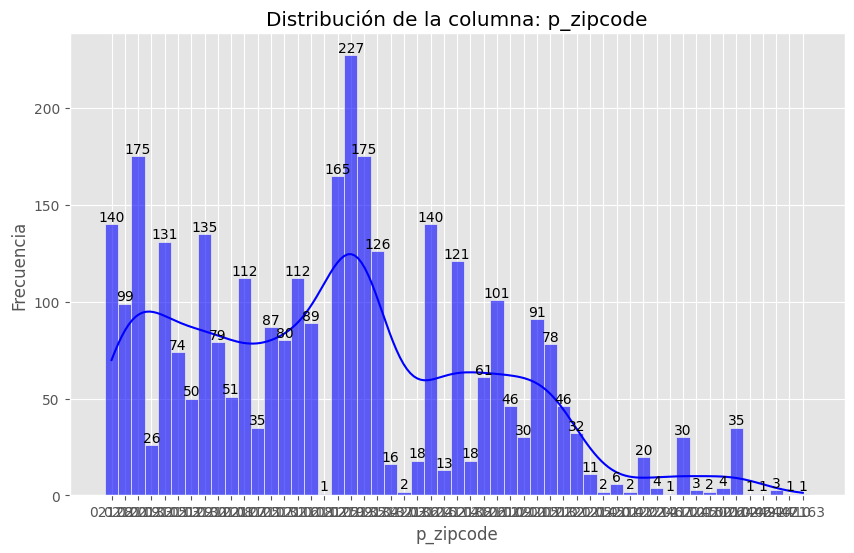

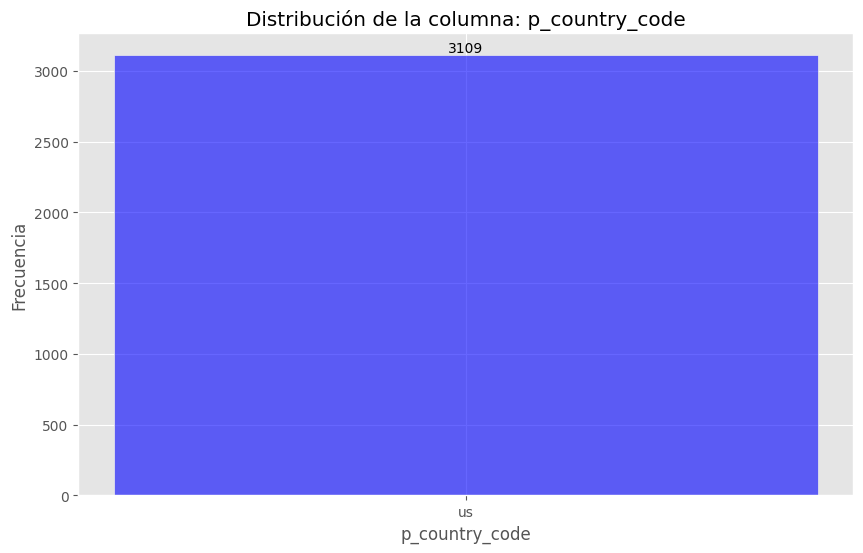

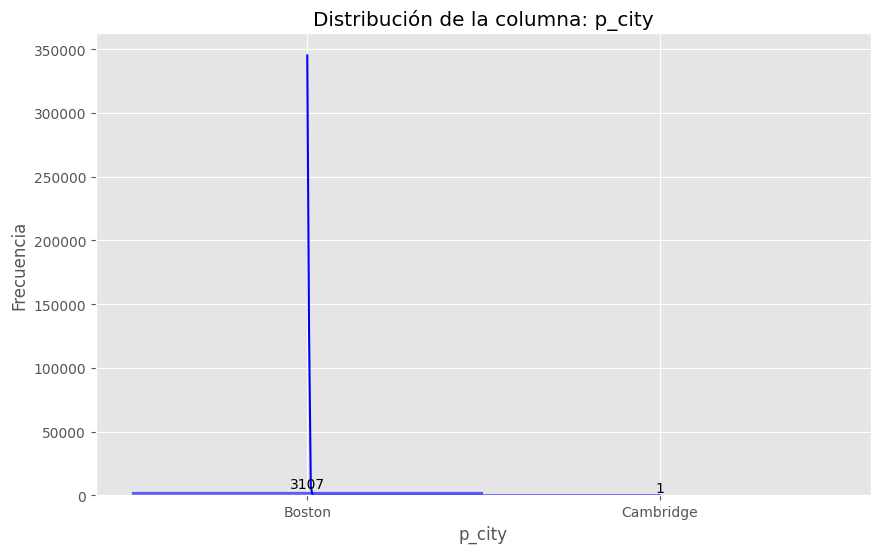

In [559]:
#Revision d edatos de pais y ciudad obrtenidos del api publico

mostrar_distribucion(df_descargados_sin_basura,'p_zipcode')
mostrar_distribucion(df_descargados_sin_basura,'p_country_code')
mostrar_distribucion(df_descargados_sin_basura,'p_city')

In [560]:

# Mostrar el mapa
mostrar_ubicaciones_geograficas_mapa(df_descargados_sin_basura)


# Se revisa la ubicacion de losregistros en base a la longitud y latitud y se determina que todos los puntos estan en el mismo pais 
# y en la misma ubicacion geografica, , por tanto para ls columnas latitude, longitude , p_conuntry_code, p_city no se consideraran para el modelado
# La unica clumna que se considerarr sera  p_zipcode

In [561]:


#para normalizar normalizar


#convertir el string prices a numero
# Primero, eliminar el signo '$', las comas ',' y reemplazar '.00' por ''
# Reemplazar el signo '$', las comas ',' y '.00' por '' y luego convertir a float
df_descargados_sin_basura['p_price'] = df_descargados_sin_basura['price'].replace({'\$': '', '\.00': '', ',': ''}, regex=True)
df_descargados_sin_basura['p_phost_response_rate'] = df_descargados_sin_basura['host_response_rate'].replace({'%': ''}, regex=True)
df_descargados_sin_basura['p_host_acceptance_rate'] = df_descargados_sin_basura['host_acceptance_rate'].replace({'%': ''}, regex=True)

##df_descargados_sin_basura['p_price'] = pd.to_numeric(df_descargados_sin_basura['p_price'], errors='coerce')
df_descargados_sin_basura['p_price'] = df_descargados_sin_basura['p_price'].astype(int)



# Verificar el resultado
print(df_descargados_sin_basura[['price', 'p_price']].head(3))

     price  p_price
0  $125.00      125
1  $135.00      135
2  $179.00      179


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\.'
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1471126343.py:7: SyntaxWarning: invalid escape sequence '\$'
  df_descargados_sin_basura['p_price'] = df_descargados_sin_basura['price'].replace({'\$': '', '\.00': '', ',': ''}, regex=True)
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1471126343.py:7: SyntaxWarning: invalid escape sequence '\.'
  df_descargados_sin_basura['p_price'] = df_descargados_sin_basura['price'].replace({'\$': '', '\.00': '', ',': ''}, regex=True)


Columna: p_price
  Q1: 76.0, Q3: 200.0, IQR: 124.0
  Límite inferior: -110.0, Límite superior: 386.0
  Cantidad de registros fuera de los outliers: 255
--------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


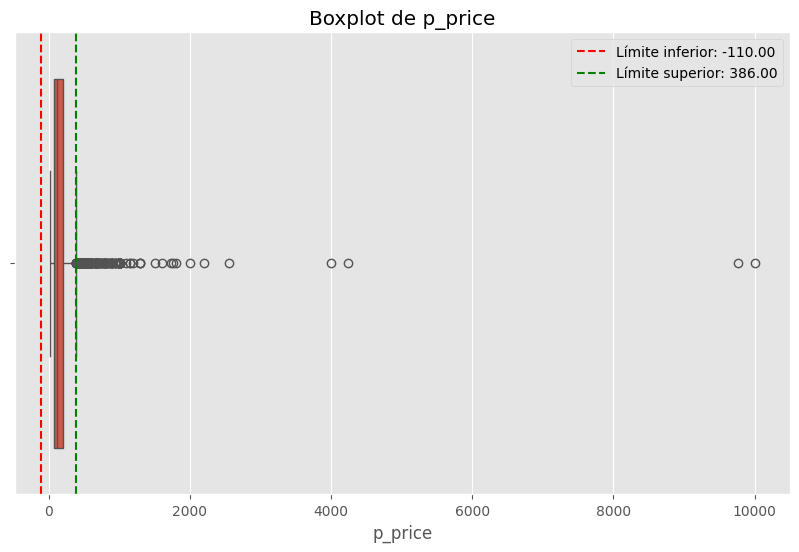

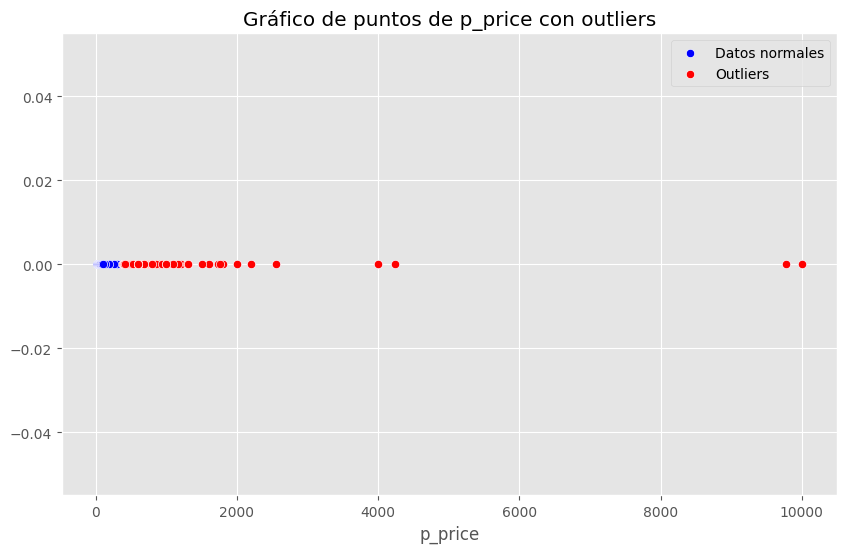

limites -110  386  


In [562]:
# Llamada a la función con el nombre de la columna deseada
limite_inferior_price,limite_superior_price=detectar_outliers(df_descargados_sin_basura, 'p_price')  # Aquí puedes cambiar 'price' por cualquier otra columna

limite_inferior_price = int(limite_inferior_price)
limite_superior_price = int(limite_superior_price)

print(f"limites {limite_inferior_price}  {limite_superior_price}  ")

df = preprocesar_datos_outliers_precio(df_descargados_sin_basura, 'p_price', limite_inferior_price,limite_superior_price)  #eliminar outliers  de price



In [563]:

df_descargados_sin_basura = normalizar_aplicar_tfidfc(df_descargados_sin_basura, 'host_about')


############################################################
FECHA_MAXIMA_SCRAPING='2023-12-19'
print(f"limites price: {limite_inferior_price}   {limite_superior_price}")

df_descargados_sin_basura_copoy=df_descargados_sin_basura.copy()
df_descargados_sin_basura_copoy     = A_Preparar_Entrenamiento(df_descargados_sin_basura_copoy,FECHA_MAXIMA_SCRAPING)

print(f">>>>>A Training set: {df_descargados_sin_basura.shape[0]} filas  x {df_descargados_sin_basura.shape[1]}")

df_descargados_sin_basura_res = B_preprocesado_general_completar_tipos(df_descargados_sin_basura,df_descargados_sin_basura_copoy,FECHA_MAXIMA_SCRAPING )
df_descargados_sin_basura_res = C_preprocesado_general(df_descargados_sin_basura_res,  limite_inferior_price,limite_superior_price)
df_descargados_sin_basura_res = D_preprocesado_normalizado_general(df_descargados_sin_basura_res)
print(f">>>>>B Training set: {df_descargados_sin_basura_res.shape[0]} filas  x {df_descargados_sin_basura_res.shape[1]}")


/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:191: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna_texto].fillna('', inplace=True)
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:211: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4876910312016492' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index,f"{prefijo}{col_name}"]=v

limites price: -110   386
>>>>>A Training set: 3109 filas  x 81


/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:235: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna] = df[columna].fillna(valor_nulo)
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:234: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columna] = df[columna].replace({'t': True, 'f': False})
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:234: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_verifications', 'p_country_code', 'p_city', 'first_review', 'last_review', 'price', 'host_about', 'host_verifications_e']
 - Tratando columna host_is_superhost   boolcomo booleano
 - Normalizando la columna host_listings_count int64
 - Normalizando la columna host_total_listings_count int64
 - Tratando columna host_has_profile_pic   boolcomo booleano
 - Tratando columna host_identity_verified   boolcomo booleano
 - Normalizando la columna latitude float64
 - Normalizando la columna longitude float64
 - Normalizando la columna accommodates int64
 - Normalizando la columna beds int64
 - Normalizando la columna minimum_nights int64
 - Normalizando la columna maximum_nights int64
 - Normalizando la columna minimum_minimum_nights int64
 - Normalizando la columna maximum_minimum_nights int64
 - Normalizando la columna minimum_maximum_nights int64
 - Normalizando la columna maximum_maximum_nights int64
 - Normalizando la colum

/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:247: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columna].fillna(valor_reemplazo, inplace=True)
/var/folders/st/xbn_8w394yv34nmt7b0qkrdw0000gn/T/ipykernel_27439/1922741840.py:247: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [564]:
#Split de datos en train/val/test.

# Suponiendo que 'df' es tu DataFrame cargado
# Separar las características (X) y la variable objetivo (y)
X = df_descargados_sin_basura_res  # Suponiendo que 'price' es la variable objetivo y se eliminara antes de realizar el el modelado
y = df_descargados_sin_basura_res['p_price']

# Paso 1: Dividir en conjunto de entrenamiento (train) y conjunto de prueba (test)
X_train_0, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Dividir el conjunto de entrenamiento (train) en entrenamiento y validación (val)
X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train, test_size=0.2, random_state=42)

# Mostrar las dimensiones de cada conjunto
print(f"Training set: {X_train.shape[0]} filas")
print(f"Validation set: {X_val.shape[0]} filas")
print(f"Test set: {X_test.shape[0]} filas")

Training set: 1989 filas
Validation set: 498 filas
Test set: 622 filas


In [565]:
#funciones de eliminacion  de elementsos que no se consideraar en el modelado





def obtener_moda(df, columna):
    moda = df[columna].mode()[0]  # Se toma el primer valor de la moda si hay más de uno.
    return moda

def obtener_media(df, columna):
    media = df[columna].mean()
    return media






def convertir_a_int(df, columna):
    if columna not in df.columns:
        return df
    df[columna] = df[columna].astype(int)    
    
    return df

def reemplazar_valores_columna(df, columna, valor_original, valor_nuevo):
    df[columna] = df[columna].replace(valor_original, valor_nuevo)
        
    return df




def separar_y_crear_columnas(df, columna, prefijo):

    df[columna] = df[columna].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    for index, row in df.iterrows():
        if isinstance(row[columna], list):  # Asegurarse de que es una lista
            for item in row[columna]:
                nueva_columna = f"{prefijo}{columna}_{item}"
                df.at[index, nueva_columna] = True  # O puedes asignar cualquier valor (1, True, etc.)    
    return df












def convertir_a_int_nulos_con_moda(df, columna):
    df[columna] = df[columna].astype(str)
    moda = df[columna].mode()[0]  # Obtener la moda (valor más frecuente)
    moda_=int(float(moda))
    df[columna] = df[columna].replace('nan', str(moda_))  # Reemplazar 'nan' por la moda como string
    df[columna] = pd.to_numeric(df[columna], errors='coerce') 
    df[columna] = df[columna].astype(int)
    return df

def convertir_a_int_nulos_con_media(df, columna):
    df[columna] = df[columna].astype(str)
    media = df[columna].apply(pd.to_numeric, errors='coerce').mean()  # Convertir primero a numérico para calcular la media
    media_ = int(float(media))
    df[columna] = df[columna].replace('nan', str(media_))  # Reemplazar 'nan' por la media como string
    df[columna] = pd.to_numeric(df[columna], errors='coerce') 
    df[columna] = df[columna].astype(int)
    return df


def convertir_a_int_nulos_con_moda_conjuntos(df, columna,X_entrenameinto):
    df[columna] = df[columna].astype(str)
    moda = X_entrenameinto[columna].mode()[0]  # Obtener la moda (valor más frecuente)
    moda_=int(float(moda))
    df[columna] = df[columna].replace('nan', str(moda_))  # Reemplazar 'nan' por la moda como string
    df[columna] = pd.to_numeric(df[columna], errors='coerce')     
    df[columna] = df[columna].astype(int)
    return df

def convertir_a_int_nulos_con_media_conjuntos(df, columna,X_entrenameinto):
    df[columna] = df[columna].astype(str)
    media = X_entrenameinto[columna].apply(pd.to_numeric, errors='coerce').mean()  # Convertir primero a numérico para calcular la media
    media_ = int(float(media))
    df[columna] = df[columna].replace('nan', str(media_))  # Reemplazar 'nan' por la media como string
    df[columna] = pd.to_numeric(df[columna], errors='coerce')     
    df[columna] = df[columna].astype(int)
    return df


def convertir_a_float_nulos_con_moda_conjuntos(df, columna,X_entrenameinto):
    df[columna] = df[columna].astype(str)
    moda = X_entrenameinto[columna].mode()[0]  # Obtener la moda (valor más frecuente)
    moda_=float(moda)
    df[columna] = df[columna].replace('nan', str(moda_))  # Reemplazar 'nan' por la moda como string
    df[columna] = pd.to_numeric(df[columna], errors='coerce')     
    df[columna] = df[columna].astype(float)
    return df

def convertir_a_float_nulos_con_moda(df, columna):
    df[columna] = df[columna].astype(str)
    moda = df[columna].mode()[0]  # Obtener la moda (valor más frecuente)
    moda_=float(moda)
    df[columna] = df[columna].replace('nan', str(moda_))  # Reemplazar 'nan' por la moda como string
    df[columna] = pd.to_numeric(df[columna], errors='coerce')     
    df[columna] = df[columna].astype(float)
    return df









In [566]:

print(f">>>>>Training set: {X_train.shape[0]} filas  x {X_train.shape[1]}")
print(f">>>>>>Validation set: {X_val.shape[0]} filas x {X_val.shape[1]}")
print(f">>>>>Test set: {X_test.shape[0]} filas x{X_test.shape[1]}")
#####################################################


X_train_index = X_train[['id', 'p_price','latitude','longitude','archivo_imagen']].copy()  
X_train_index['index'] = X_train.index  

X_val_index = X_val[['id', 'p_price','latitude','longitude','archivo_imagen']].copy()  
X_val_index['index'] = X_val.index 

X_test_index = X_test[['id', 'p_price','latitude','longitude','archivo_imagen']].copy()  
X_test_index['index'] = X_test.index  






columns_to_drop = [
            'id',
            'latitude',
            'longitude',
            'archivo_imagen'
            ]
columns_present_in_df = [col for col in columns_to_drop if col in X_train.columns]

X_train.drop(columns=columns_present_in_df, inplace=True)
X_val.drop(columns=columns_present_in_df, inplace=True)
X_test.drop(columns=columns_present_in_df, inplace=True)
    


#######################################################

print(f">>>>>Training set: {X_train.shape[0]} filas  x {X_train.shape[1]}")
print(f">>>>Validation set: {X_val.shape[0]} filas x {X_val.shape[1]}")
print(f">>>>>Test set: {X_test.shape[0]} filas x{X_test.shape[1]}")




X_train_index.to_pickle(f"pickles/06_X_train_index.pkl")
X_train.to_pickle(f"pickles/06_X_train_filtrado.pkl")
y_train.to_pickle(f"pickles/06_Y_train.pkl")

X_val_index.to_pickle(f"pickles/06_X_val_index.pkl")
X_val.to_pickle(f"pickles/06_X_val_filtrado.pkl")
y_val.to_pickle(f"pickles/06_Y_val.pkl")

X_test_index.to_pickle(f"pickles/06_X_test_index.pkl")
X_test.to_pickle(f"pickles/06_X_test_filtrado.pkl")
y_test.to_pickle(f"pickles/06_Y_test.pkl")


print(f">>>>>>>>>>>>>Grabado") 



>>>>>Training set: 1989 filas  x 1461
>>>>>>Validation set: 498 filas x 1461
>>>>>Test set: 622 filas x1461
>>>>>Training set: 1989 filas  x 1457
>>>>Validation set: 498 filas x 1457
>>>>>Test set: 622 filas x1457
>>>>>>>>>>>>>Grabado


In [567]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación

df_combined = df_descargados_sin_basura_copoy.copy()  # Copiar X_train para no modificar el original
df_combined['p_price'] = X_train_index['p_price']  # Agregar la columna y_train al DataFrame

# Seleccionar sólo columnas numéricas después de codificar
numeric_data = df_combined.select_dtypes(include=['float64', 'int64', 'uint8', 'bool'])

# Verificar si 'Price' está en las columnas numéricas
if 'p_price' in numeric_data.columns:
    # Calcular la matriz de correlación
    correlation_matrix = numeric_data.corr()

    # Extraer correlaciones con 'Price'
    correlation_with_price = correlation_matrix['p_price'].sort_values(ascending=False)

    correlacion_alta = correlation_with_price[abs(correlation_with_price) > 0.5]  # Correlación alta (> 0.5)
    correlacion_media = correlation_with_price[(abs(correlation_with_price) >= 0.3) & (abs(correlation_with_price) <= 0.5)]  # Correlación moderada (0.3-0.5)
    correlacion_baja = correlation_with_price[abs(correlation_with_price) < 0.3]  # Correlación baja (< 0.3)

    print("Variables fuertemente correlacionadas con 'Price':")
    print(correlacion_alta)

    print("\nVariables moderadamente correlacionadas con 'Price':")
    print(correlacion_media)

    print("\nVariables débilmente correlacionadas con 'Price':")
    print(correlacion_baja)

    correlacion_highly_df = df_combined[correlacion_alta.index]
    correlacion_moderately_correlated_df = df_combined[correlacion_media.index]
    correlacion_weakly_df = df_combined[correlacion_baja.index]

    

Variables fuertemente correlacionadas con 'Price':
p_price    1.0
Name: p_price, dtype: float64

Variables moderadamente correlacionadas con 'Price':
accommodates    0.311693
beds            0.309360
Name: p_price, dtype: float64

Variables débilmente correlacionadas con 'Price':
p_last_review                                   0.096438
longitude                                       0.088813
latitude                                        0.063802
p_phost_response_rate                           0.057917
maximum_nights                                  0.045226
maximum_maximum_nights                          0.038225
maximum_nights_avg_ntm                          0.037973
tfidf_provide                                   0.021418
minimum_maximum_nights                          0.013492
host_id                                         0.013397
host_listings_count                             0.009473
review_scores_location                          0.006672
review_scores_cleanliness          

In [568]:
#nNormalización* y redimensionado de imágenes 



image_dir = "imagenes"  # Directorio donde están las imágenes

def cargar_imagenes(df, image_dir, target_size=(224, 224)):
    images = []
    for idx, row in df.iterrows():
        image_id = str(int(row['id'])) 
        image_nombre= str(row['archivo_imagen'])
        ubicacion=image_dir+image_nombre
        # Cargar la imagen
        img_path = os.path.join(image_dir, image_nombre )
        img = load_img(img_path, target_size=target_size)  # Redimensionar la imagen
        img_array = img_to_array(img)  # Convertir a array
        img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para batch
#        img_array = preprocess_input(img_array)  # Normalización según el modelo preentrenado
        images.append(img_array)
    
    return np.vstack(images)  # Convertir la lista de arrays en un array numpy

X_train_images = cargar_imagenes(X_train_index, image_dir)
X_val_images = cargar_imagenes(X_val_index, image_dir)
X_test_images = cargar_imagenes(X_test_index, image_dir)

print(X_train_images.shape)  # Debe ser (num_samples, 224, 224, 3)
print(X_val_images.shape)  # Debe ser (num_samples, 224, 224, 3)
print(X_test_images.shape)  # Debe ser (num_samples, 224, 224, 3)




(1989, 224, 224, 3)
(498, 224, 224, 3)
(622, 224, 224, 3)


## 2 Modelado: Modelo 1D/tabular 

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5965 - mae: 0.3422 - val_loss: 2.0151 - val_mae: 0.3138
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0368 - mae: 0.2876 - val_loss: 2.0123 - val_mae: 0.3193
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6327 - mae: 0.3075 - val_loss: 2.0037 - val_mae: 0.3096
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9494 - mae: 0.3127 - val_loss: 1.9953 - val_mae: 0.3028
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5418 - mae: 0.3284 - val_loss: 1.9889 - val_mae: 0.3107
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9367 - mae: 0.2906 - val_loss: 1.9860 - val_mae: 0.3128
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5460 - mae: 0.3042 - val_loss: 1.9806 - val_mae: 0.3069
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3948 - mae: 0.3147 - val_loss: 1.9750 - val_mae: 0.3057
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0614 - mae: 0.2894 - va

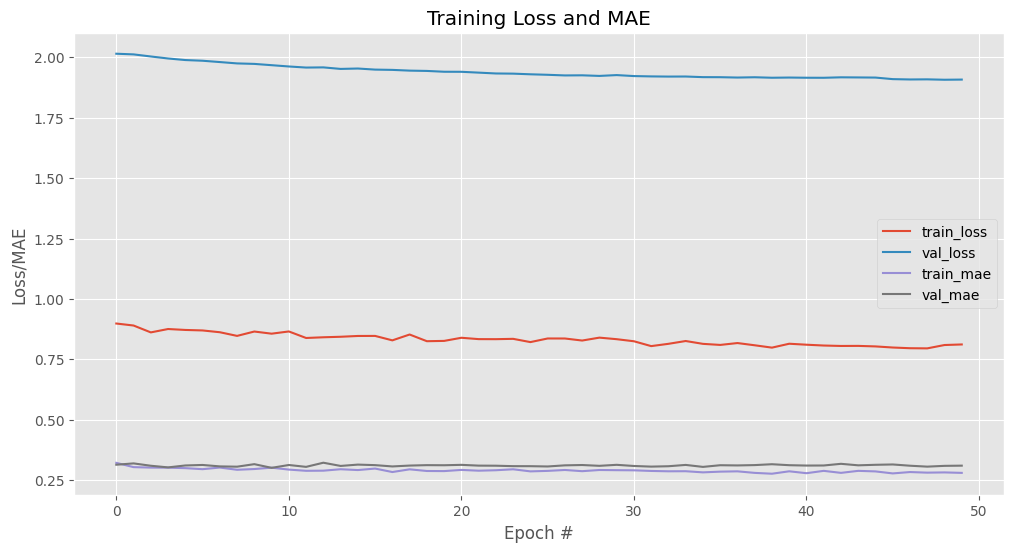

In [571]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

############################################################
#columns_to_select = ['accommodates', 'beds', 'p_last_review', 'p_phost_response_rate']
#columns_to_select = ['accommodates', 'beds', 'p_phost_response_rate']
columns_to_select = ['accommodates', 'beds', ]
zipcode_columns = X_train.filter(like='p_p_zipcode_', axis=1)
columns_to_select.extend(zipcode_columns.columns.tolist())

X_train_con_columans_seleccionadas = X_train[columns_to_select]
X_val_con_columans_seleccionadas = X_val[columns_to_select]
X_test_con_columans_seleccionadas = X_test[columns_to_select]

############################################################

# X_train, X_val, X_test deben ser tus datos tabulares de características
#X_train_scaled = (X_train)  # Ajusta y transforma el conjunto de entrenamiento
#X_val_scaled = (X_val)  # Solo transforma el conjunto de validación
#X_test_scaled = (X_test)  # Solo transforma el conjunto de test

X_train_scaled = (X_train_con_columans_seleccionadas)  # Ajusta y transforma el conjunto de entrenamiento
X_val_scaled = (X_val_con_columans_seleccionadas)  # Solo transforma el conjunto de validación
X_test_scaled = (X_test_con_columans_seleccionadas)  # Solo transforma el conjunto de test

model1D = models.Sequential()
model1D.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))
model1D.add(layers.Dense(512, activation='relu'))
model1D.add(layers.Dropout(0.5))  # Regularización para evitar sobreajuste
model1D.add(layers.Dense(256, activation='relu'))
model1D.add(layers.Dropout(0.5))  # Regularización adicional
model1D.add(layers.Dense(1, activation='linear'))  # Salida lineal para predecir el precio
model1D.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Configuración de early stopping y model checkpoint para guardar el mejor modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_airbnb.keras', monitor='val_loss', save_best_only=True)

# Entrenamiento del modelo
history = model1D.fit(
    X_train_scaled, y_train,  # X_train_scaled son las características escaladas, y_train es el precio
    epochs=50, 
    batch_size=32, 
    validation_data=(X_val_scaled, y_val),  # X_val_scaled y y_val para validación
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model1D.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Realizar predicciones en el conjunto de prueba
predictions = model1D.predict(X_test_scaled)

# Cálculo de R²
r2 = r2_score(y_test, predictions)
print(f"Test R²: {r2}")

# Visualización de las métricas de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Training Loss and MAE')
plt.xlabel('Epoch #')
plt.ylabel('Loss/MAE')
plt.legend()
plt.show()

## 2 Modelado: Modelo 2D /Imagenes

In [ ]:
# Asegurarte de que los datos de imágenes sean de tipo float32 y tengan la forma adecuada
X_train_images = X_train_images.astype('float32')
X_val_images = X_val_images.astype('float32')
X_test_images = X_test_images.astype('float32')



from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K
import numpy as np

# Preprocesar las imágenes
from tensorflow.keras.applications.resnet50 import preprocess_input

X_train_images = preprocess_input(X_train_images)
X_val_images = preprocess_input(X_val_images)
X_test_images = preprocess_input(X_test_images)

# Cargar el modelo base (ResNet50) preentrenado sin la parte superior
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar el modelo base

model2D = models.Sequential()
model2D.add(base_model)
model2D.add(layers.GlobalAveragePooling2D())
model2D.add(layers.Dense(128, activation='relu'))
model2D.add(layers.Dense(1, activation='linear'))  # Salida lineal para regresión
model2D.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_airbnb.keras', monitor='val_loss', save_best_only=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-7, verbose=1)


history = model2D.fit(
    X_train_images, y_train,  # X_train_images es el array de imágenes y y_train es el precio
    epochs=20, 
    batch_size=32, 
    validation_data=(X_val_images, y_val),  # X_val_images y y_val para validación
    callbacks=[early_stopping, checkpoint, lr_reduction],
    verbose=1
)




# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model2D.evaluate(X_test_images, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Realizar predicciones en el conjunto de prueba
predictions = model2D.predict(X_test_images)



# Para calcular RMSE (Raíz del Error Cuadrático Medio)
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Compilar el modelo con RMSE como una métrica personalizada
model2D.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae', rmse])

# Evaluar el modelo en el conjunto de prueba con RMSE#
test_loss, test_mae, test_rmse = model2D.evaluate(X_test_images, y_test)


print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 519ms/step - loss: 0.9315 - mae: 0.5876 - val_loss: 2.0866 - val_mae: 0.4465 - learning_rate: 1.0000e-04
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - loss: 0.5552 - mae: 0.4282 - val_loss: 2.2588 - val_mae: 0.7051 - learning_rate: 1.0000e-04
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - loss: 0.8667 - mae: 0.5998 - val_loss: 2.0840 - val_mae: 0.4286 - learning_rate: 1.0000e-04
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 514ms/step - loss: 1.4265 - mae: 0.4740 - val_loss: 2.0784 - val_mae: 0.4113 - learning_rate: 1.0000e-04
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 506ms/step - loss: 0.6373 - mae: 0.3882 - val_loss: 2.1020 - val_mae: 0.4250 - learning_rate: 1.0000e-04
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 568ms/step - loss: 1.1199 - mae: 0.4243 - val_loss: 2.0459 - val_mae: 0.4253 - learning_rate: 1.0000e-04
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 518ms/step - loss: 1.5180 - mae: 0.4904 - val_loss: 2.0492 - val_mae: 0.4306

## 3 Fusión de modelos: Estrategia late-fusion

In [572]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split

# Asumimos que ya tienes tus datos de imágenes (X_test_images) y datos tabulares (X_test_scaled)
# y_test es la variable objetivo (por ejemplo, 'price')



X_train_scaled=X_train_con_columans_seleccionadas 
X_val_scaled=X_val_con_columans_seleccionadas 
X_test_scaled=X_test_con_columans_seleccionadas 



# Entrenar el modelo 1D para los datos tabulares
model1D = models.Sequential()

# Capa de entrada con el número de características de los datos (ajustar num_features según corresponda)
model1D.add(layers.InputLayer(input_shape=(X_train_scaled.shape[1],)))

# Añadir capas densas
model1D.add(layers.Dense(512, activation='relu'))
model1D.add(layers.Dropout(0.5))  # Regularización para evitar sobreajuste

model1D.add(layers.Dense(256, activation='relu'))
model1D.add(layers.Dropout(0.5))  # Regularización adicional

# Capa de salida para la regresión
model1D.add(layers.Dense(1, activation='linear'))  # Salida lineal para predecir el precio

# Compilación del modelo
model1D.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Configuración de early stopping y model checkpoint para guardar el mejor modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_1D.keras', monitor='val_loss', save_best_only=True)

# Entrenamiento del modelo
history_1D = model1D.fit(
    X_train_scaled, y_train,  # X_train_scaled son las características escaladas, y_train es el precio
    epochs=50, 
    batch_size=32, 
    validation_data=(X_val_scaled, y_val),  # X_val_scaled y y_val para validación
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Realizar predicciones con el modelo 1D para los datos tabulares
predictions_1D = model1D.predict(X_test_scaled)

##################################################################################


X_train_images = preprocess_input(X_train_images)
X_val_images = preprocess_input(X_val_images)
X_test_images = preprocess_input(X_test_images)


# Modelo 2D: Pre-entrenado con una arquitectura como ResNet50
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar las capas preentrenadas

# Agregar capas adicionales para realizar la clasificación o regresión
model2D = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='linear')  # Salida para la regresión
])

# Compilación del modelo
model2D.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo 2D
history_2D = model2D.fit(
    X_train_images, y_train,  # X_train_images son las imágenes y y_train es el precio
    epochs=50, 
    batch_size=32, 
    validation_data=(X_val_images, y_val),  # X_val_images y y_val para validación
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Realizar predicciones con el modelo 2D para las imágenes
predictions_2D = model2D.predict(X_test_images)

# Ahora fusionamos las predicciones de ambos modelos

# Combinar las predicciones de ambos modelos
combined_predictions = np.column_stack((predictions_1D, predictions_2D))

# Crear el modelo final para la fusión de predicciones
fusion_model = models.Sequential()

# Capa densa de entrada que toma el vector de predicciones combinadas
fusion_model.add(layers.InputLayer(input_shape=(combined_predictions.shape[1],)))

# Añadir una capa densa
fusion_model.add(layers.Dense(64, activation='relu'))

# Capa de salida para la regresión
fusion_model.add(layers.Dense(1, activation='linear'))  # Para regresión, usa 'linear'

# Compilación del modelo de fusión
fusion_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo fusionado
fusion_model.fit(combined_predictions, y_test, epochs=50, batch_size=32)

# Evaluar el modelo final
fusion_model.evaluate(combined_predictions, y_test)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7264 - mae: 0.3559 - val_loss: 2.0102 - val_mae: 0.3248
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5394 - mae: 0.2801 - val_loss: 2.0091 - val_mae: 0.3393
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7319 - mae: 0.2852 - val_loss: 2.0036 - val_mae: 0.3270
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7301 - mae: 0.2910 - val_loss: 1.9965 - val_mae: 0.3253
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4655 - mae: 0.2948 - val_loss: 1.9887 - val_mae: 0.3214
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7566 - mae: 0.3014 - val_loss: 1.9880 - val_mae: 0.3253
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5207 - mae: 0.3632 - val_loss: 1.9809 - val_mae: 0.3195
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4981 - mae: 0.2755 - val_loss: 1.9768 - val_mae: 0.3245
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1470 - mae: 0.3073 - va

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.2668 - mae: 0.2749
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.1769 - mae: 0.2537
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.1838 - mae: 0.2518
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.2488 - mae: 0.2620
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.1616 - mae: 0.2383
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.1537 - mae: 0.2202
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.2106 - mae: 0.2561
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.1463 - mae: 0.2280
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 0.1567 - mae: 0.2287
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.1589 - mae: 0.2222
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 0.1749 - mae: 0.2407
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.1391 - mae: 0.2167
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━

[0.1563357561826706, 0.23364152014255524]

## 3 Fusión de modelos: Estrategia early-fusion

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3487', 'keras_tensor_3668']. Received: the structure of inputs=('*', '*')
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - loss: 1.5147 - mae: 0.6526

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3487', 'keras_tensor_3668']. Received: the structure of inputs=('*', '*')
  warnings.warn(


63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 524ms/step - loss: 1.5103 - mae: 0.6510 - val_loss: 2.0523 - val_mae: 0.3985
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 533ms/step - loss: 0.5431 - mae: 0.4208 - val_loss: 2.0188 - val_mae: 0.3836
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 521ms/step - loss: 1.7267 - mae: 0.4201 - val_loss: 2.0101 - val_mae: 0.3854
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 509ms/step - loss: 0.9152 - mae: 0.3827 - val_loss: 2.0064 - val_mae: 0.3692
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 529ms/step - loss: 2.1023 - mae: 0.4086 - val_loss: 1.9862 - val_mae: 0.3489
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 556ms/step - loss: 0.5921 - mae: 0.3460 - val_loss: 1.9493 - val_mae: 0.3377
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 524ms/step - loss: 0.5681 - mae: 0.3422 - val_loss: 1.9116 - val_mae: 0.3332
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 516ms/step - loss: 1.5440 - mae: 0.3596 - val_loss: 1.9263 - val_mae: 0.3267
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 508ms/step - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_3487', 'keras_tensor_3668']. Received: the structure of inputs=('*', '*')
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step
Test R²: 0.38922410720800926


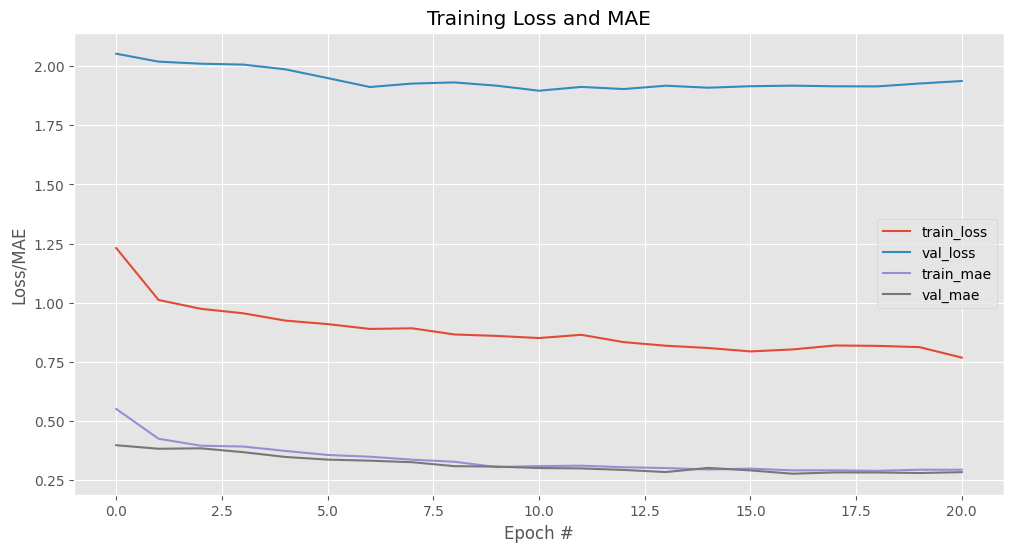

In [576]:
from tensorflow.keras import layers, models
import tensorflow as tf

X_train_scaled=X_train_con_columans_seleccionadas 
X_val_scaled=X_val_con_columans_seleccionadas 
X_test_scaled=X_test_con_columans_seleccionadas 


# Modelo 1D para datos tabulares
model1D_input = layers.Input(shape=(X_train_scaled.shape[1],))
model1D = layers.Dense(512, activation='relu')(model1D_input)
model1D = layers.Dropout(0.5)(model1D)
model1D = layers.Dense(256, activation='relu')(model1D)
model1D = layers.Dropout(0.5)(model1D)
model1D = layers.Dense(128, activation='relu')(model1D)  # Salida del modelo 1D (embeddings para datos tabulares)

# Modelo 2D para imágenes (usando ResNet50 como base preentrenada)
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelar las capas preentrenadas

model2D_input = layers.Input(shape=(224, 224, 3))
model2D = base_model(model2D_input)
model2D = layers.GlobalAveragePooling2D()(model2D)
model2D = layers.Dense(128, activation='relu')(model2D)
model2D = layers.Dropout(0.5)(model2D)

# Fusionar las salidas de los dos modelos
merged = layers.concatenate([model1D, model2D])

# Añadir capas densas para la fusión
x = layers.Dense(128, activation='relu')(merged)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)

# Capa de salida para regresión
output = layers.Dense(1, activation='linear')(x)

# Crear el modelo final
fusion_model = models.Model(inputs=[model1D_input, model2D_input], outputs=output)

# Compilación del modelo
fusion_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                     loss='mean_squared_error', 
                     metrics=['mae'])

# Configuración de early stopping y model checkpoint para guardar el mejor modelo
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model_early_fusion.keras', monitor='val_loss', save_best_only=True)

# Entrenamiento del modelo
history_fusion = fusion_model.fit(
    [X_train_scaled, X_train_images], y_train,  # X_train_scaled son las características escaladas, y_train es el precio
    epochs=50, 
    batch_size=32, 
    validation_data=([X_val_scaled, X_val_images], y_val),  # X_val_scaled y y_val para validación
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# Evaluar el modelo con el conjunto de test
test_loss, test_mae = fusion_model.evaluate([X_test_scaled, X_test_images], y_test)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

# Realizar predicciones con el conjunto de test
predictions = fusion_model.predict([X_test_scaled, X_test_images])

# Cálculo de R²
r2 = r2_score(y_test, predictions)
print(f"Test R²: {r2}")

# Visualización de las métricas de entrenamiento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_fusion.history['loss'], label='train_loss')
plt.plot(history_fusion.history['val_loss'], label='val_loss')
plt.plot(history_fusion.history['mae'], label='train_mae')
plt.plot(history_fusion.history['val_mae'], label='val_mae')
plt.title('Training Loss and MAE')
plt.xlabel('Epoch #')
plt.ylabel('Loss/MAE')
plt.legend()
plt.show()